In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Árvore de Decisão

Exercício Base de Crédito

In [3]:
df_credito = pd.read_csv('bases\ex3_base_credito.csv')
df_credito

,idade,renda,divida,utilizacao_credito,consultas_recentes,inadimplencia,idade_cat
0,66,5000.309210,1999.040283,0.657097,5.812374,0,"(60,70]"
1,54,5001.161586,2001.149934,0.000000,5.317636,1,"(49,60]"
2,18,4999.755158,1999.396955,1.000000,6.067782,0,"[18,28]"
3,42,4999.277468,1999.901786,0.000000,4.656145,1,"(39,49]"
4,27,4999.853832,1999.029522,0.196419,3.515599,0,"[18,28]"
...,...,...,...,...,...,...,...
9995,65,4999.460574,2001.197451,0.000000,3.648736,0,"(60,70]"
9996,53,5001.384369,2001.827312,0.000000,4.698368,1,"(49,60]"
9997,33,4999.310830,1998.124939,1.000000,5.202398,0,"(28,39]"
9998,52,4999.553070,1999.378548,1.000000,5.175605,1,"(49,60]"


In [4]:
df_credito.describe()

,idade,renda,divida,utilizacao_credito,consultas_recentes,inadimplencia
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.005400,5000.018629,2000.005084,0.499972,5.003716,0.244900
std,15.273051,0.993963,1.002786,0.430797,0.998400,0.430049
min,18.000000,4995.844720,1995.918872,0.000000,1.384752,0.000000
25%,31.000000,4999.351522,1999.331929,0.000000,4.339399,0.000000
50%,44.000000,5000.011359,2000.003558,0.500278,5.002811,0.000000
75%,57.000000,5000.696730,2000.685315,1.000000,5.677647,0.000000
max,70.000000,5003.391185,2003.753002,1.000000,8.739947,1.000000


In [5]:
df_credito.corr().round(1)

,idade,renda,divida,utilizacao_credito,consultas_recentes,inadimplencia
idade,1.0,-0.0,0.0,0.0,0.0,-0.1
renda,-0.0,1.0,0.3,0.2,-0.1,-0.1
divida,0.0,0.3,1.0,-0.1,0.2,0.1
utilizacao_credito,0.0,0.2,-0.1,1.0,0.3,-0.4
consultas_recentes,0.0,-0.1,0.2,0.3,1.0,0.0
inadimplencia,-0.1,-0.1,0.1,-0.4,0.0,1.0


# Análise Descritiva

## Inadimplência por Idade

In [18]:
taxa_inad = df_credito[['idade_cat', 'inadimplencia', 'idade']].groupby(['idade_cat'], as_index=False).aggregate({'inadimplencia':'mean', 'idade':'count'})
taxa_inad.sort_values('idade_cat')

,idade_cat,inadimplencia,idade
0,"(28,39]",0.274078,2087
1,"(39,49]",0.231869,1889
2,"(49,60]",0.229197,2055
3,"(60,70]",0.215676,1901
4,"[18,28]",0.269826,2068


In [19]:
def grafico(var1, var2):
    # Create figure and axis #1
    fig, ax1 = plt.subplots()
    # plot line chart on axis #1
    ax1.plot(var1, taxa_inad.inadimplencia) 
    ax1.set_ylabel('Taxa de Inadimplência')
    ax1.set_xlabel(f'FX {var2}')
    #ax1.set_ylim(0, 25)
    #ax1.legend(['Taxa Mortalidade'], loc="upper left")

    # set up the 2nd axis
    ax2 = ax1.twinx()

    # plot bar chart on axis #2
    ax2.bar(var1, var2, width=0.5, alpha=0.5, color='green')
    ax2.grid(False) # turn off grid #2
    ax2.set_ylabel('Frequência')
    #ax2.set_ylim(0, 90)
    #ax2.legend(['Frequência'], loc="upper right")
    plt.show()

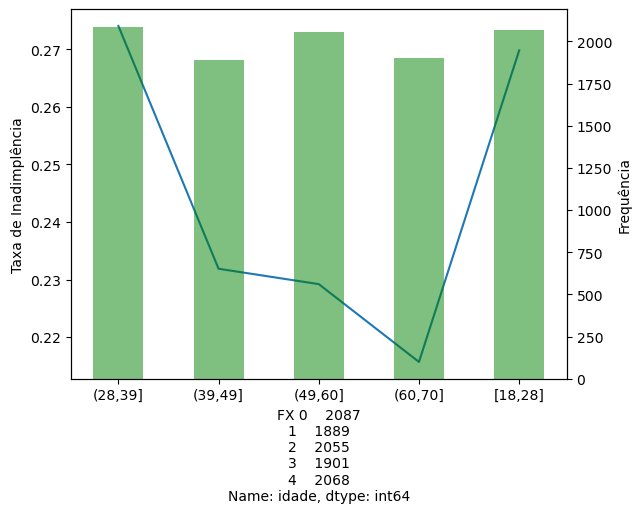

In [20]:
grafico(taxa_inad.idade_cat, taxa_inad.idade)

In [21]:
taxa_inad

,idade_cat,inadimplencia,idade
0,"(28,39]",0.274078,2087
1,"(39,49]",0.231869,1889
2,"(49,60]",0.229197,2055
3,"(60,70]",0.215676,1901
4,"[18,28]",0.269826,2068


## Inadimplência por Renda

<AxesSubplot:>

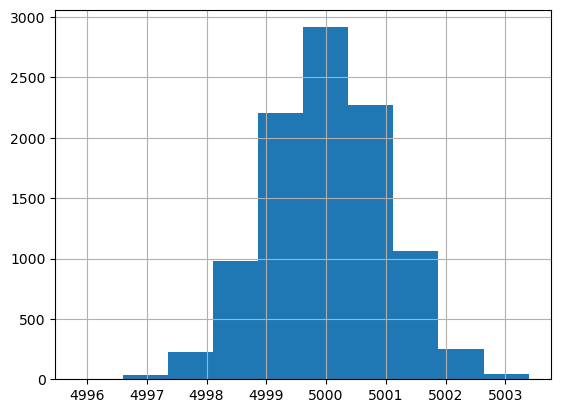

In [22]:
df_credito.renda.hist()

In [23]:
df_credito['fx_renda'] = pd.qcut(df_credito['renda'], q=3, duplicates='drop', precision=1).astype('str')
df_credito

,idade,renda,divida,utilizacao_credito,consultas_recentes,inadimplencia,idade_cat,fx_renda
0,66,5000.309210,1999.040283,0.657097,5.812374,0,"(60,70]","(4999.6, 5000.5]"
1,54,5001.161586,2001.149934,0.000000,5.317636,1,"(49,60]","(5000.5, 5003.4]"
2,18,4999.755158,1999.396955,1.000000,6.067782,0,"[18,28]","(4999.6, 5000.5]"
3,42,4999.277468,1999.901786,0.000000,4.656145,1,"(39,49]","(4995.7, 4999.6]"
4,27,4999.853832,1999.029522,0.196419,3.515599,0,"[18,28]","(4999.6, 5000.5]"
...,...,...,...,...,...,...,...,...
9995,65,4999.460574,2001.197451,0.000000,3.648736,0,"(60,70]","(4995.7, 4999.6]"
9996,53,5001.384369,2001.827312,0.000000,4.698368,1,"(49,60]","(5000.5, 5003.4]"
9997,33,4999.310830,1998.124939,1.000000,5.202398,0,"(28,39]","(4995.7, 4999.6]"
9998,52,4999.553070,1999.378548,1.000000,5.175605,1,"(49,60]","(4995.7, 4999.6]"


<AxesSubplot:>

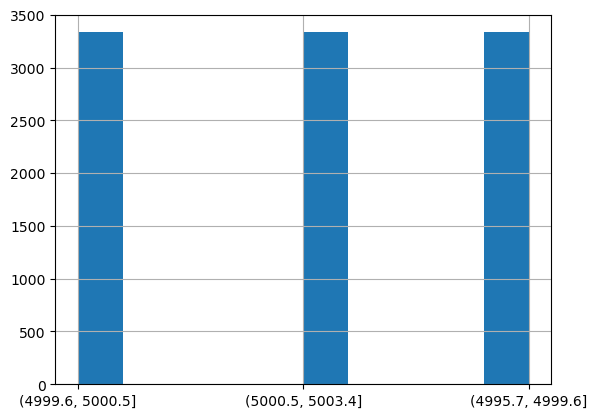

In [24]:
df_credito.fx_renda.hist()

In [25]:
taxa_inad = df_credito[['fx_renda', 'inadimplencia', 'renda']].groupby(['fx_renda'], as_index=False).aggregate({'inadimplencia':'mean', 'renda':'count'})

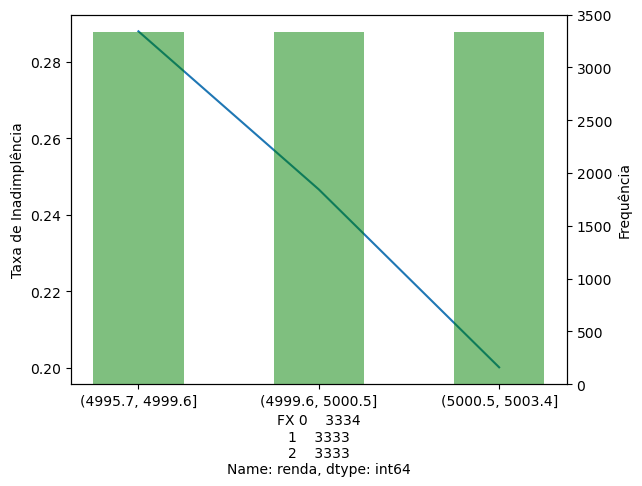

In [26]:
grafico(taxa_inad.fx_renda, taxa_inad.renda)

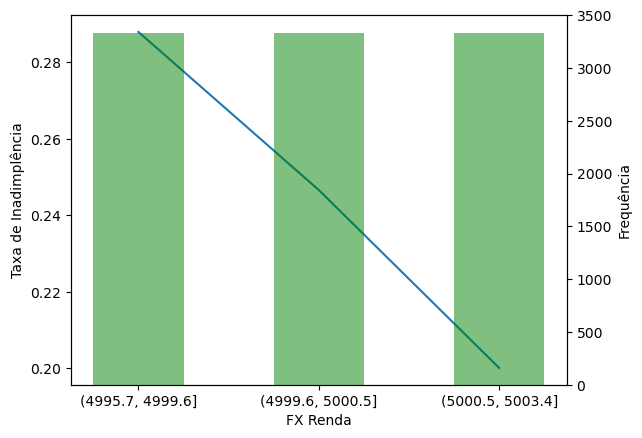

In [12]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_inad['fx_renda'], taxa_inad.inadimplencia) 
ax1.set_ylabel('Taxa de Inadimplência')
ax1.set_xlabel('FX Renda')
#ax1.set_ylim(0, 25)
#ax1.legend(['Taxa Mortalidade'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_inad.fx_renda, taxa_inad.renda, width=0.5, alpha=0.5, color='green')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
#ax2.set_ylim(0, 90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Inadimplência por Dívida

<AxesSubplot:>

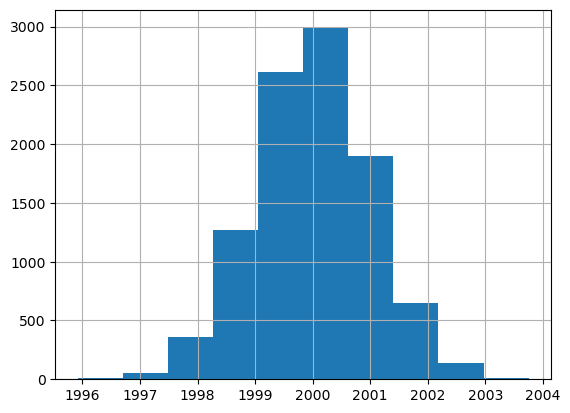

In [13]:
df_credito.divida.hist()

<AxesSubplot:>

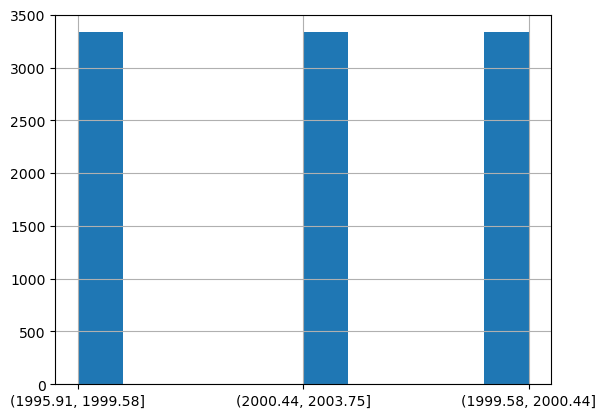

In [14]:
df_credito['fx_divida'] = pd.qcut(df_credito['divida'], q=3, duplicates='drop', precision=2).astype('str')
df_credito.fx_divida.hist()

In [15]:
taxa_inad = df_credito[['fx_divida', 'inadimplencia', 'divida']].groupby(['fx_divida'], as_index=False).aggregate({'inadimplencia':'mean', 'divida':'count'})

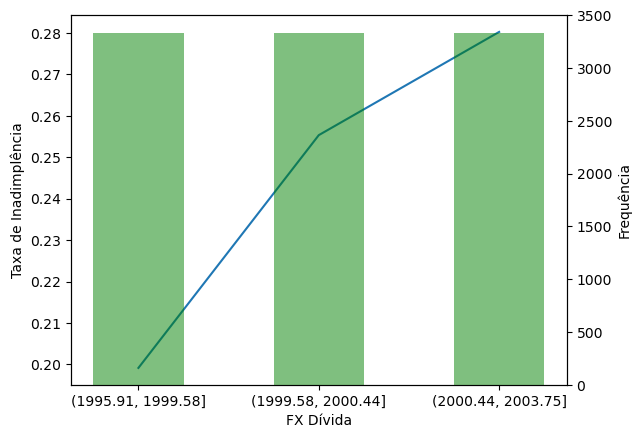

In [16]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_inad['fx_divida'], taxa_inad.inadimplencia) 
ax1.set_ylabel('Taxa de Inadimplência')
ax1.set_xlabel('FX Dívida')
#ax1.set_ylim(0, 25)
#ax1.legend(['Taxa Mortalidade'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_inad.fx_divida, taxa_inad.divida, width=0.5, alpha=0.5, color='green')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
#ax2.set_ylim(0, 90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Inadimplência por Utilização de Crédito

<AxesSubplot:>

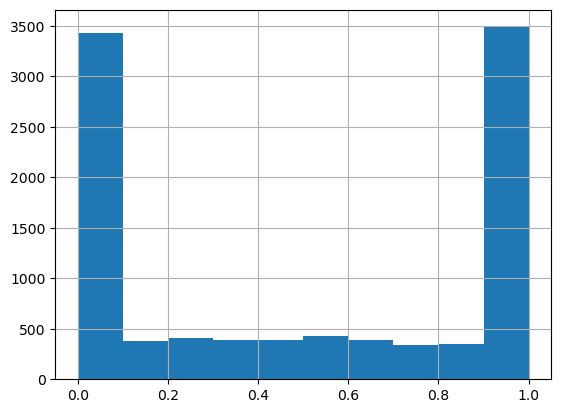

In [17]:
df_credito.utilizacao_credito.hist()

<AxesSubplot:>

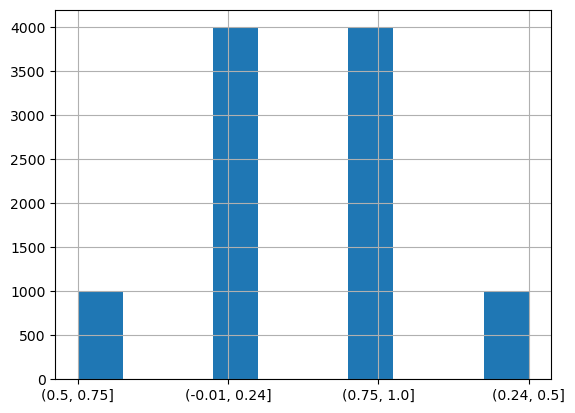

In [18]:
df_credito['fx_uti_cred'] = pd.qcut(df_credito['utilizacao_credito'], q=10, duplicates='drop', precision=2).astype('str')
df_credito.fx_uti_cred.hist()

In [19]:
taxa_inad = df_credito[['fx_uti_cred', 'inadimplencia', 'utilizacao_credito']].groupby(['fx_uti_cred'], as_index=False).aggregate({'inadimplencia':'mean', 'utilizacao_credito':'count'})

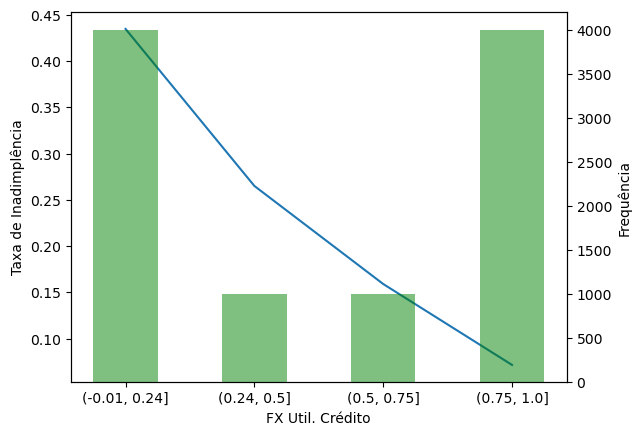

In [20]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.plot(taxa_inad['fx_uti_cred'], taxa_inad.inadimplencia) 
ax1.set_ylabel('Taxa de Inadimplência')
ax1.set_xlabel('FX Util. Crédito')
#ax1.set_ylim(0, 25)
#ax1.legend(['Taxa Mortalidade'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_inad.fx_uti_cred, taxa_inad.utilizacao_credito, width=0.5, alpha=0.5, color='green')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
#ax2.set_ylim(0, 90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Inadimplência por Consultas_recentes

<AxesSubplot:>

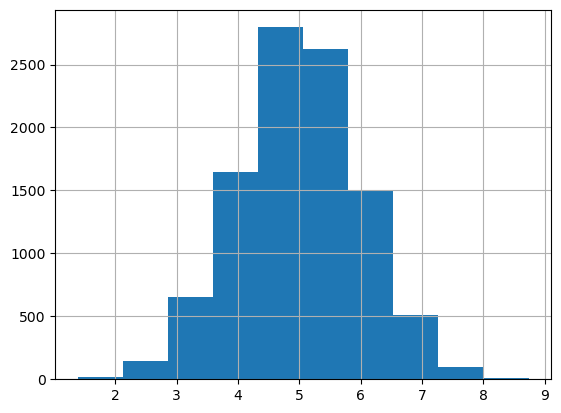

In [21]:
df_credito.consultas_recentes.hist()

<AxesSubplot:>

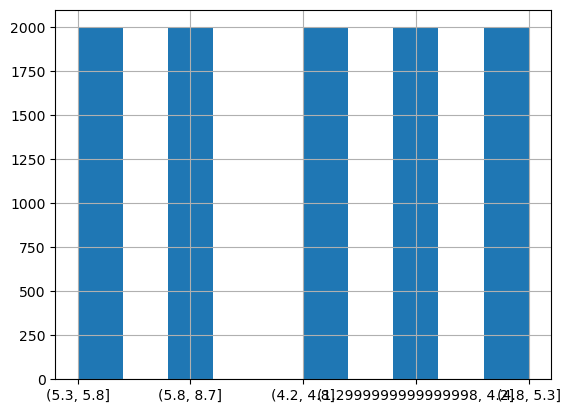

In [22]:
df_credito['fx_consulta'] = pd.qcut(df_credito['consultas_recentes'], q=5, duplicates='drop', precision=1).astype('str')
df_credito.fx_consulta.hist()

In [23]:
taxa_inad = df_credito[['fx_consulta', 'inadimplencia', 'consultas_recentes']].groupby(['fx_consulta'], as_index=False).aggregate({'inadimplencia':'mean', 'consultas_recentes':'count'})

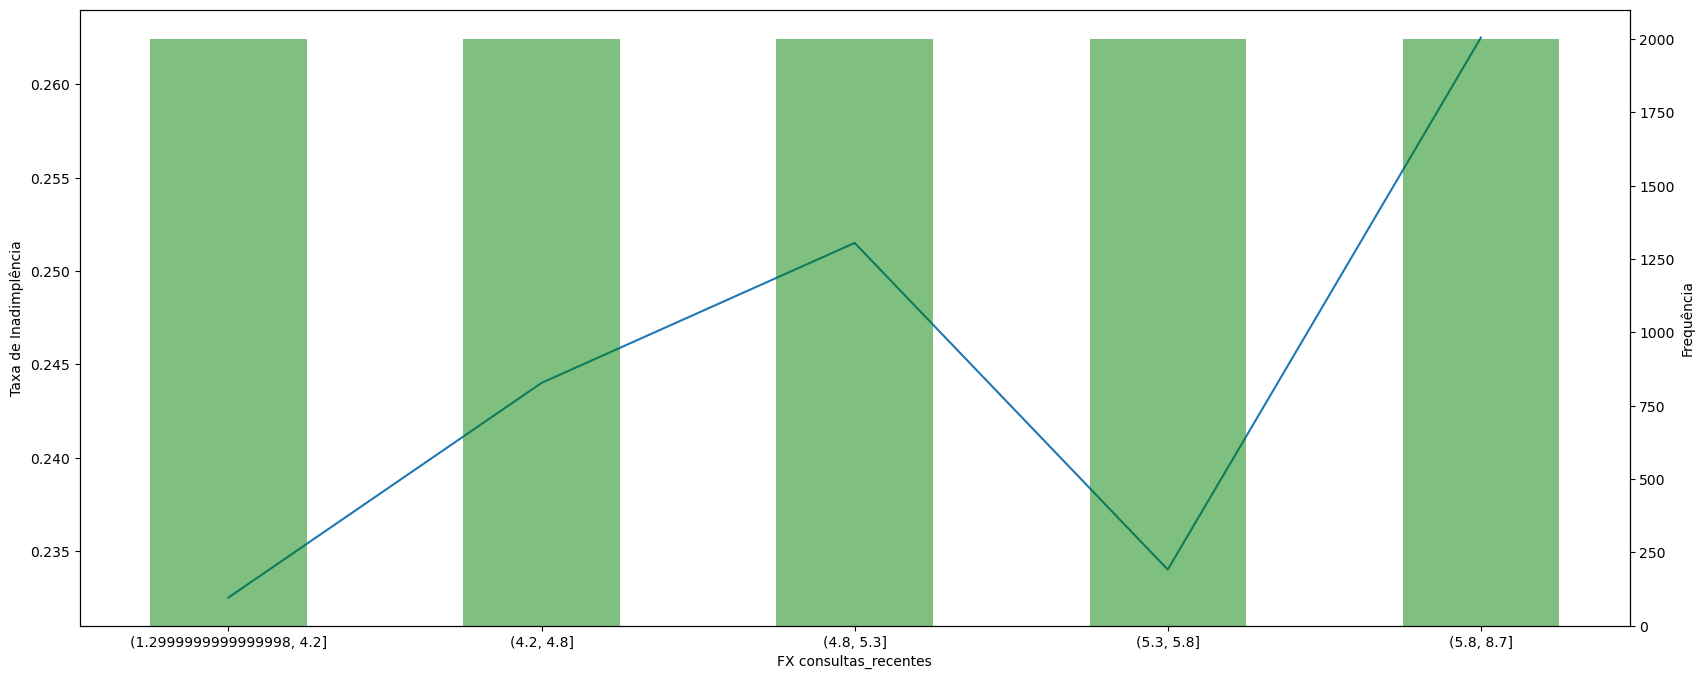

In [24]:
# Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(20,8))
# plot line chart on axis #1
ax1.plot(taxa_inad['fx_consulta'], taxa_inad.inadimplencia) 
ax1.set_ylabel('Taxa de Inadimplência')
ax1.set_xlabel('FX consultas_recentes')
#ax1.set_ylim(0, 25)
#ax1.legend(['Taxa Mortalidade'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(taxa_inad.fx_consulta, taxa_inad.consultas_recentes, width=0.5, alpha=0.5, color='green')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Frequência')
#ax2.set_ylim(0, 90)
#ax2.legend(['Frequência'], loc="upper right")
plt.show()

## Construir Árvore de Decisão

Documentação: https://scikit-learn.org/stable/modules/tree.html

Qual variável nos dá mais informação para separar quem teve mais chance de sobreviver?<br>
No case o Sexo é uma variável que tem bastante diferença entre as probabilidades de sobrevivência

A regra que será usada para trazer qual variável é mais importante para compor um nó, será o índice de GINI ou Entropia (decidir o que agrega mais informação e pureza do grupo - minimizar a impureza do grupo).

> Maior o valor de Gini, maior a homogenidade;

### Hiperparâmetros:

- Número mínimo de observações por folha (min_samples_split);
- Produnfidade máxima (max_depth);
- CP: custo de complexidade;


In [25]:
from sklearn.model_selection import train_test_split # to split data into training and testing sets

var_x = df_credito.iloc[:,:5]

X_train, X_test, y_train, y_test = train_test_split(var_x, 
                                                    df_credito['inadimplencia'], 
                                                    #random_state=123, 
                                                    test_size=0.25)

In [26]:
len(X_train), len(X_test)

(7500, 2500)

In [27]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
# Aplicando o Modelo
model = DecisionTreeClassifier(criterion='gini', 
                               ccp_alpha = 0, 
                               min_samples_leaf=1, 
                               #random_state=123,
                               max_depth = 30)
dt = model.fit(X_train, y_train)

In [28]:
# Predict na Base de Treino
y_pred_train = dt.predict(X_train)

# Predict na Base de Teste
y_pred_test = dt.predict(X_test)

## Acurácia

In [29]:
from sklearn.metrics import accuracy_score
print(f'Acurácia Treino: {accuracy_score(y_train, y_pred_train)}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_test)}')

Acurácia Treino: 0.9986666666666667
Acurácia Teste: 0.6848


## Curva ROC

### Base Treino

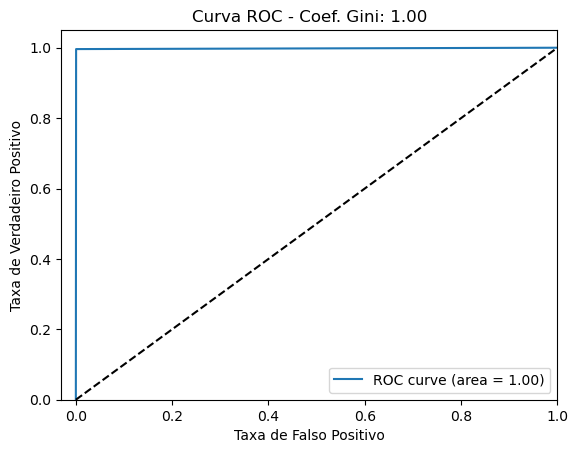

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
roc_auc = roc_auc_score(y_train, y_pred_train)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

## Base Teste

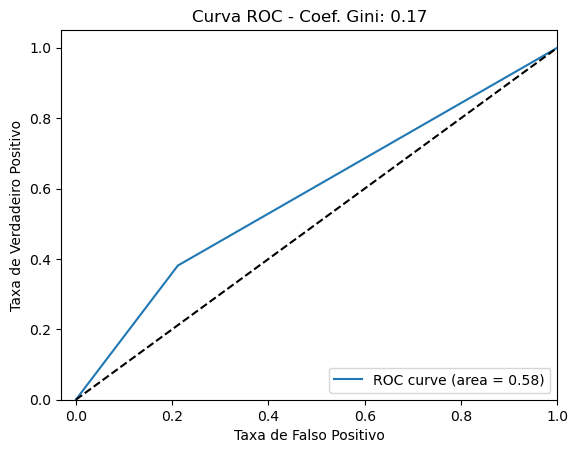

In [31]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

# Encontrando o Melhor Custo de Complexidade 

Documentação: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [32]:
path = dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

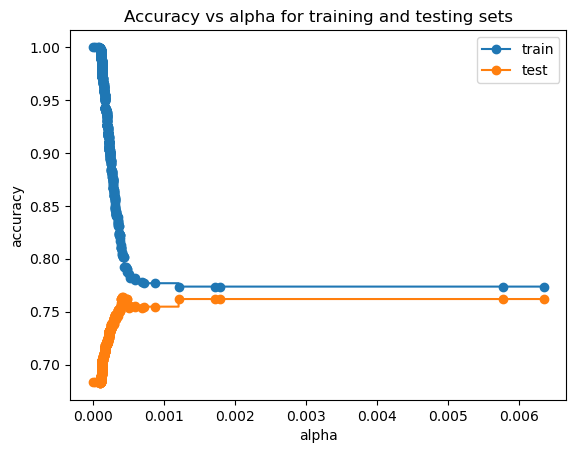

In [33]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [34]:
ccp = pd.DataFrame()
ccp['ccp_alpha'] = ccp_alphas
ccp['test_score'] = test_scores
ccp[ccp['test_score']== ccp['test_score'].max()]

,ccp_alpha,test_score
568,0.000417,0.764
569,0.000421,0.764


In [35]:
lista_ccp_alphas = pd.DataFrame(path)
lista_ccp_alphas

,ccp_alphas,impurities
0,0.000000,0.001556
1,0.000029,0.001585
2,0.000076,0.001813
3,0.000087,0.002074
4,0.000089,0.002252
...,...,...
588,0.001714,0.305394
589,0.001795,0.307189
590,0.005765,0.312955
591,0.006345,0.319299


Testando Acurácia para diferentes combinações de seleção de base teste e treino. <br>
Para cada simulação aleatória de observações da base treino e teste, resultou em diferentes acurácias no modelo.

In [36]:
from sklearn.model_selection import GridSearchCV

lista_alphas = {'ccp_alpha': np.array(lista_ccp_alphas.ccp_alphas)}

grid_search = GridSearchCV(dt, lista_alphas, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0, max_depth=30),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.90909091e-05, 7.61904762e-05, 8.69565217e-05,
       8.88888889e-05, 8.88888889e-05, 8.88888889e-05, 8.88888889e-05,
       1.00000000e-04, 1.00000000e-04, 1.04428904e-04, 1.05855513e-04,
       1.06666667e-04, 1.06666667e-04, 1.06666667e-04, 1.06666667e-04,
       1....
       4.16820816e-04, 4.20988480e-04, 4.23954274e-04, 4.24989573e-04,
       4.37756541e-04, 4.40258746e-04, 4.42048480e-04, 4.51228221e-04,
       4.61154478e-04, 4.79768626e-04, 4.80810990e-04, 4.82440059e-04,
       5.15241199e-04, 5.22927498e-04, 5.92757470e-04, 5.95195387e-04,
       6.89979036e-04, 7.20624615e-04, 8.79437900e-04, 1.20658791e-03,
       1.71433485e-03, 1.79467718e-03, 5.76545376e-03, 6.34469321e-03,
       4.74351217e-02])})

In [37]:
best_alpha = grid_search.best_params_['ccp_alpha']
best_score = grid_search.best_score_
print("Melhor valor de ccp_alpha:", best_alpha)
print("Desempenho correspondente:", best_score)

Melhor valor de ccp_alpha: 0.0007206246145852422
Desempenho correspondente: 0.7713333333333333


<AxesSubplot:xlabel='tree'>

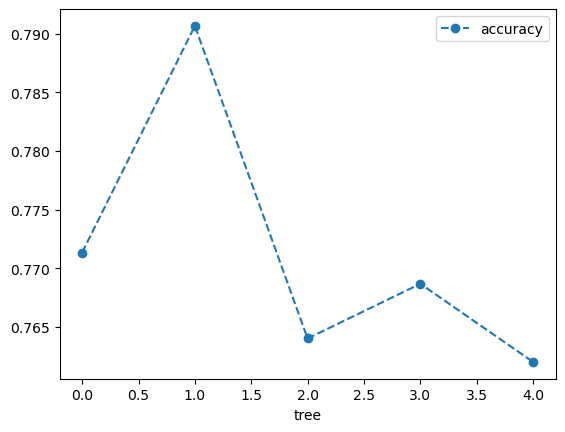

In [38]:
from sklearn.model_selection import cross_val_score # for cross validation
clf_dt = DecisionTreeClassifier(ccp_alpha=best_alpha) 

## now use 5-fold cross validation create 5 different training and testing datasets that
## are then used to train and test the tree.
## NOTE: We use 5-fold because we don't have tons of data...
scores = cross_val_score(clf_dt, X_train, y_train, cv=5) 
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [39]:
scores

array([0.77133333, 0.79066667, 0.764     , 0.76866667, 0.762     ])

### Simulando Validação Cruzada (5 k-folds)

Em validação cruzada k-fold, os dados são divididos em k partes (ou "dobras") de tamanhos aproximadamente iguais. O modelo é treinado k vezes, cada vez utilizando k-1 partes dos dados como conjunto de treinamento e a parte restante como conjunto de teste. O desempenho do modelo é então avaliado pela média dos resultados obtidos em cada iteração.

Essa técnica é utilizada para estimar a capacidade de generalização do modelo, permitindo uma avaliação mais robusta do seu desempenho, especialmente quando o tamanho do conjunto de dados é limitado.

Em resumo, a validação cruzada k-fold é uma abordagem que divide os dados em k partes, treina e avalia o modelo em múltiplas iterações, e fornece uma medida mais confiável do seu desempenho.

<AxesSubplot:xlabel='alpha'>

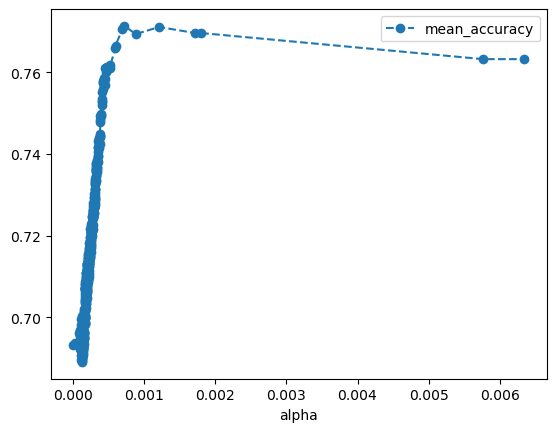

In [40]:
from sklearn.model_selection import cross_val_score # for cross validation
## create an array to store the results of each fold during cross validiation
alpha_loop_values = []

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   #yerr='std', 
                   marker='o', 
                   linestyle='--')

In [41]:
results = alpha_results[(alpha_results['alpha'] > 0.000)
              &
              (alpha_results['alpha'] < 0.001)]

results[results['mean_accuracy'] == results['mean_accuracy'].max()]

,alpha,mean_accuracy,std
585,0.000721,0.771333,0.010215


### Alpha com Máxima Acurácia Média entre o Cross-Validation

In [42]:
alpha_results[alpha_results['mean_accuracy'] == alpha_results['mean_accuracy'].max()]

,alpha,mean_accuracy,std
585,0.000721,0.771333,0.010215


### Alpha com Mínimo Desvio Padrão Médio entre o Cross-Validation

In [225]:
alpha_results[alpha_results['std'] == alpha_results['std'].min()]

,alpha,mean_accuracy,std
552,0.000357,0.738133,0.002363


# Modelo Com Poda

Utiliza o CCP que traz a maior acurácia possível

In [226]:
# Aplicando o Modelo
model = DecisionTreeClassifier(criterion='gini', 
                               ccp_alpha = 0.000758,     # alteração no CP
                               min_samples_leaf=1, 
                               max_depth = 30, 
                               random_state=1)
dt_poda = model.fit(X_train, y_train)

In [227]:
# Predict na Base de Treino
y_pred_train_poda = dt_poda.predict(X_train)

# Predict na Base de Teste
y_pred_test_poda = dt_poda.predict(X_test)

## Acurácia

In [228]:
print(f'Acurácia Treino: {accuracy_score(y_train, y_pred_train_poda)}')
print(f'Acurácia Teste: {accuracy_score(y_test, y_pred_test_poda)}')

Acurácia Treino: 0.7753333333333333
Acurácia Teste: 0.7708


## Curva ROC Poda

### Base Treino

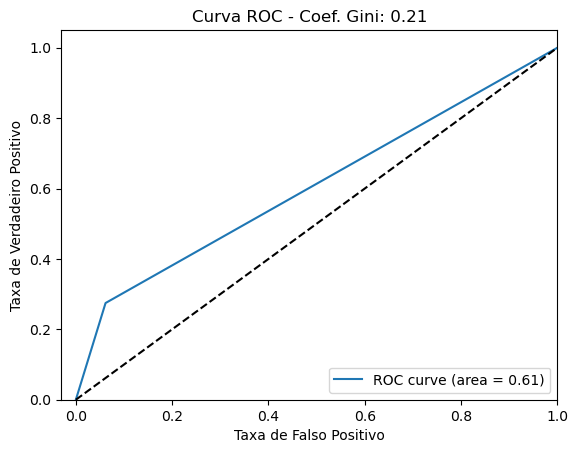

In [229]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train_poda)
roc_auc = roc_auc_score(y_train, y_pred_train_poda)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

### Base Teste Poda

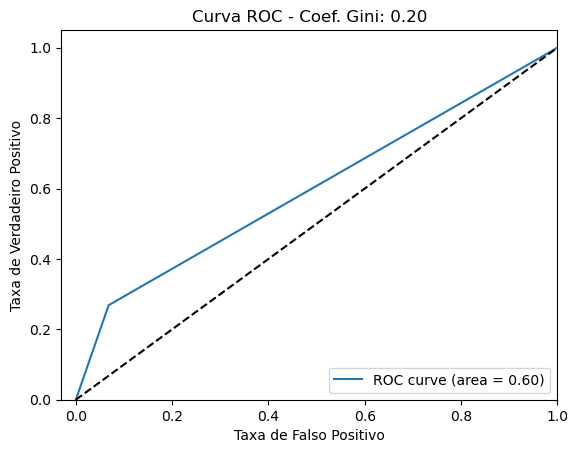

In [230]:
# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_poda)
roc_auc = roc_auc_score(y_test, y_pred_test_poda)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title(f'Curva ROC - Coef. Gini: {gini:.2f}')
plt.legend(loc="lower right")
plt.show()

## Plotando a Árvore

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

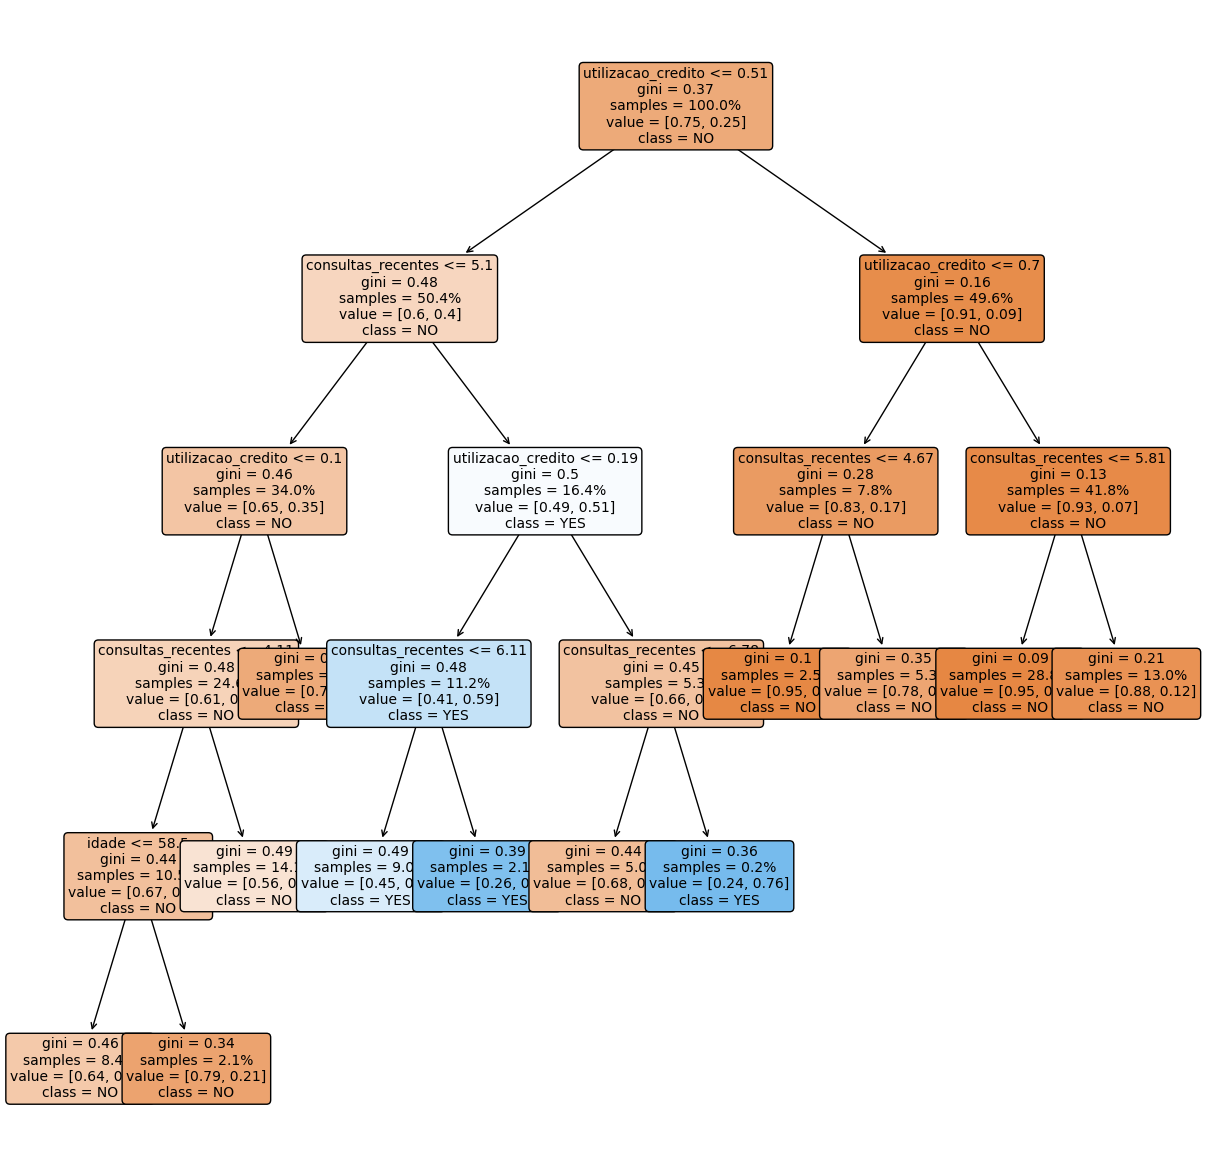

In [231]:
from sklearn.tree import plot_tree # to draw a classification tree
## NOTE: We can plot the tree and it is huge!
plt.figure(figsize=(15, 15))
plot_tree(dt_poda, 
          filled=True, 
          rounded=True, 
          proportion=True, 
          precision=2, 
          fontsize= 10, 
          class_names=["NO", "YES"], 
          feature_names=X_train.columns); 